# **Society and the Reflection of Music**
## Harish Kirubaharan | 100819561
###### When reviewing the dataset, I was shocked to recognize that there was a strong direct co-relation between psychological and behavioural changes and the kind of music that was consumed. Whether it be related to what is seen as 'trendy' at the current time or whether society as a whole is going through an adversity. Society has changed a lot throughout the last decade and has evidently reflected on the music consumed by the general population, there are patterns which can be linked to psychological and physical behaviour shifts in the population. This project will explore the relationship between music and psychological/behavioural trends. Using data provided from Kaggle I will be analyzing the top songs from 2010-2020 provided by Leonardo Henriquez to assess the changes and patterns.

In [47]:
import json
import pandas as pd

#Open the json file saved locally
with open('spotify.json', encoding="utf8") as f:
    data = json.load(f)

#Put all the data in a table
df = pd.DataFrame(data)

#remove all NaN values
df = df.dropna()

#Replace collumns with more readable names
df = df.rename(columns={'top genre': 'genre'})

#Drop all collumns that are not needed
df = df.drop(columns=['bpm', 'nrgy', 'dB', 'live', 'acous', 'spch', 'artist type'])

#Print the first 5 rows of the table
df.head()

,title,artist,genre,year released,added,dnce,val,dur,pop,top year
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,61.0,23.0,203.0,70.0,2010.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,68.0,83.0,192.0,68.0,2010.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,84.0,96.0,243.0,72.0,2010.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,66.0,38.0,180.0,80.0,2010.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,69.0,74.0,268.0,79.0,2010.0


# 1. Duration (seconds) vs Year Released
## Comparing the year the song was released with the duration of the song.

## Analysis
###### I had to remove any data before 2005 due to a singular song made in the 70s had went viral between 2010-2020 which had ruined the graph and causing for it to  have a massive gap. I had decided to plot the data using a line plot with a line of bestfit to show the downwards trend of the duration of a song vs the year that it was released.

## Discussion
###### The average human attention span has been decreasing over the years. According to published study done by Microsoft, in the year 2000, the average human attention span was 12 seconds. When the same test was conducted in 2013 the average attention span has dropped down to 8 seconds. This can be seen in the data as the average duration of songs has been decreasing over the years. The average duration of a song in 2010 was 4 minutes, in 2019 it was 3 minutes 20 seconds. This is a 40 second difference in the average duration of a song.

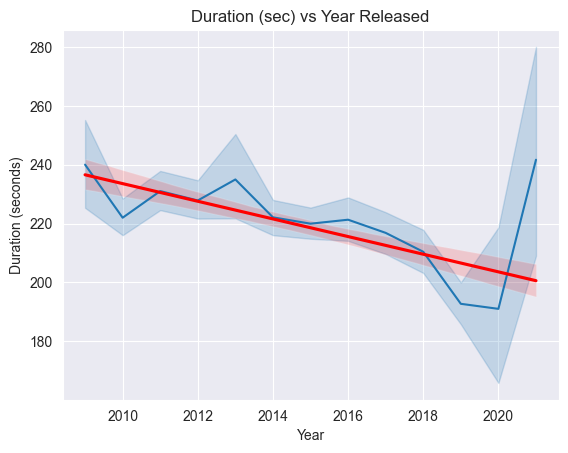

In [48]:
import seaborn as sns

#Remove data before 2005
df = df[df['year released'] > 2005]
ax = sns.lineplot(x="year released", y="dur", data=df)

#Line of best fit
sns.regplot(x="year released", y="dur", data=df, scatter=False, color="red")

#Change the x-axis label
ax.set(xlabel='Year')
#Change the y-axis label
ax.set(ylabel='Duration (seconds)')

ax.title.set_text('Duration (sec) vs Year Released')

# 2. Valence vs Year Released
## Comparing the year the song was released with the valence of the song.
###### The valence of a song is a measure of the positivity of a song. A valence of 1 is a very positive song and a valence of 0 is a very negative song. I had decided to plot the data using a line plot with a line of bestfit to show the upwards trend of the valence of a song vs the year that it was released.

## Analysis
###### I had to remove any data before 2005 due to a singular song made in the 70s had went viral between 2010-2020 which had ruined the graph and causing for it to  have a massive gap, I had also divded all the numbers in the "valence" column by 100 to get the correct values (valance is normally on a scale of 0-1). I had decided to plot the data using a line plot with a line of bestfit to show the downward trend of the valence of a song vs the year that it was released.

## Discussion
###### The valance of songs other the span of the last 10 years has dropped significantly. We notice a sharp decline in the year 2020. This can be accredited to the COVID-19 pandemic which has caused increased the amount of stress, anxiety and depression in the population. According to Dr Nawaz Ahmad, a professor at Iqra University, music has strong reflection of one's mood. The valance of songs in 2010 was 0.55, in 2019 it was 0.4. This is a 0.15 difference in the average valance of a song.

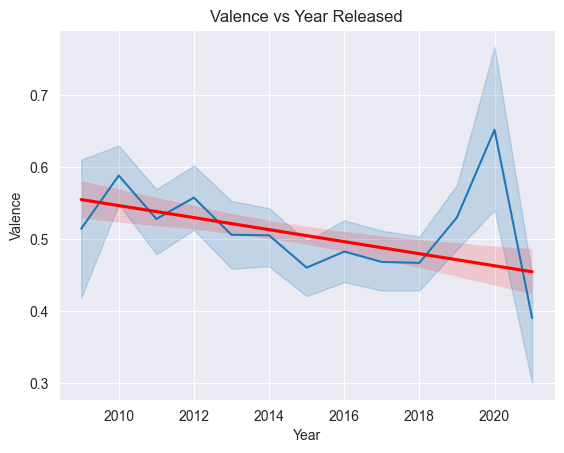

In [49]:
import seaborn as sns

df['val'] = df['val'].div(100)

#Remove data before 2005
df = df[df['year released'] > 2005]
ax = sns.lineplot(x="year released", y="val", data=df)

#Line of best fit
sns.regplot(x="year released", y="val", data=df, scatter=False, color="red")

#Change the x-axis label
ax.set(xlabel='Year')
#Change the y-axis label
ax.set(ylabel='Valence')

ax.title.set_text('Valence vs Year Released')

# 3. Year Released vs Top Genre
## Comparing the top genre of year to the year it was released.

## Analysis
###### I had grouped together sub-genres which can be umbrellaed under the same genre so the data can be more accurate. Then, I had then found the most popular genre for that year and plotted it on a bar graph with a legend to the right indicating what genre is what colour. I had decided to plot the data using a bar graph to show the top genres over the years.

## Discussion
###### The top genre of music has for the most part been different every year. Continuing on from my point previously, I would like to more closely look at the data from 2017 - 2020. Between the years 2017 - 2019, it is obsereved that the most popular genres are: rock, dance and edm. These genres of music have a very high energy level, very upbeat and during these years we see that the valence of popular music is on average going upwards. Although the most popular genre in 2020 is pop, which statistically has a much lower valence and is much less upbeat and high energy on average. This goes back to the psychological affect that the pandemic has had on the population and it's reflection on the music that is consumed.


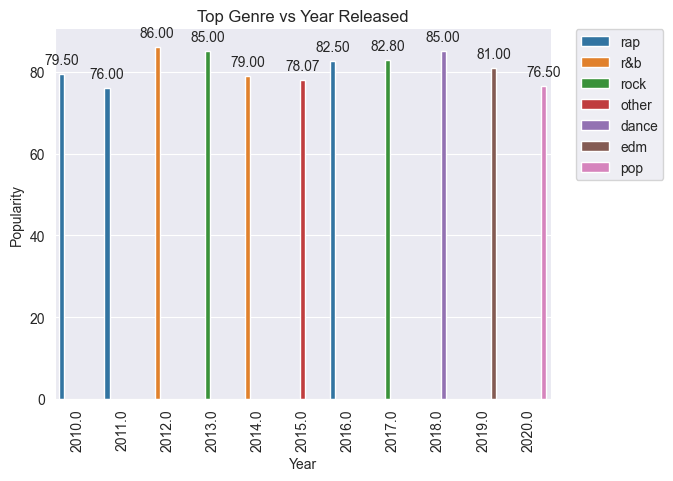

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df.loc[df['genre'].str.contains('pop'), 'genre'] = 'pop'
df.loc[df['genre'].str.contains('r&b'), 'genre'] = 'r&b'
df.loc[df['genre'].str.contains('hip hop'), 'genre'] = 'hip hop'
df.loc[df['genre'].str.contains('rap'), 'genre'] = 'rap'
df.loc[df['genre'].str.contains('drill'), 'genre'] = 'drill'
df.loc[df['genre'].str.contains('latin'), 'genre'] = 'latin'
df.loc[df['genre'].str.contains('dance'), 'genre'] = 'dance'
df.loc[df['genre'].str.contains('edm'), 'genre'] = 'edm'
df.loc[df['genre'].str.contains('electro'), 'genre'] = 'electro'
df.loc[df['genre'].str.contains('rock'), 'genre'] = 'rock'
df.loc[df['genre'].str.contains('metal'), 'genre'] = 'metal'
df.loc[df['genre'].str.contains('punk'), 'genre'] = 'punk'
df.loc[df['genre'].str.contains('country'), 'genre'] = 'country'
df.loc[df['genre'].str.contains('folk'), 'genre'] = 'folk'
#Anyother genre is "other"

df.loc[~df['genre'].str.contains('pop|r&b|hip hop|rap|drill|latin|dance|edm|electro|rock|metal|punk|country|folk'), 'genre'] = 'other'

#Graph most popular genre by year
df2 = df.groupby(['year released', 'genre']).agg({'pop': 'mean'})
df2 = df2.reset_index()
df2 = df2[df2['year released'] >= 2010]
df2 = df2[df2['year released'] <= 2020]

df2 = df2.sort_values(by=['year released', 'pop'], ascending=[True, False])
df2 = df2.groupby(['year released']).head(1)
df2 = df2.sort_values(by=['year released'])

ax = sns.barplot(x="year released", y="pop", hue="genre", data=df2)
#Rotate the x-axis labels
plt.xticks(rotation=90)
#Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Change the x-axis label
ax.set(xlabel='Year')

#Change the y-axis label
ax.set(ylabel='Popularity')

ax.title.set_text('Top Genre vs Year Released')

#Add the popularity values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#Move the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 4. Year Released vs Danceability
## Comparing the danceability of a song to the year it was released.

## Analysis
###### I had to remove any data before 2005 due to a singular song made in the 70s had went viral between 2010-2020 which had ruined the graph and causing for it to have a massive gap in the data. I had then plotted the data using a line graph to show the average danceability of songs over the years. I also added a line of best fit to show the trend of the data.

## Discussion
###### As the years progress we are able to observe an upward trend in the danceability of songs. This is due to the popularity in apps such as musical.ly and TikTok. These apps have allowed for people to create and share their own dances to songs. Musical.ly began seeing popularity in 2015, where we see the sudden spike in danceability of popular songs. This has caused for the danceability of songs to increase as the years progress.

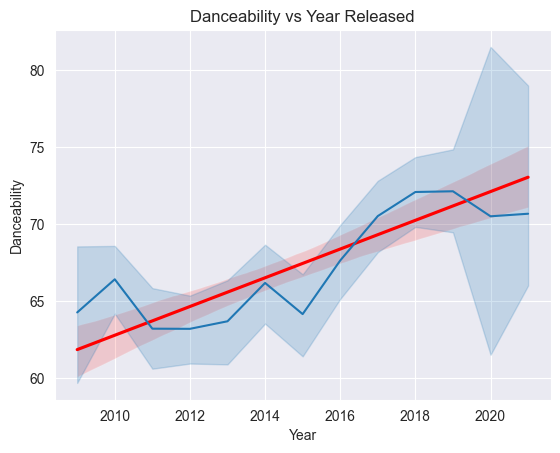

In [51]:
#danceability vs year
import seaborn as sns

#Remove data before 2005
df = df[df['year released'] > 2005]

#Line of best fit
sns.regplot(x="year released", y="dnce", data=df, scatter=False, color="red")

ax = sns.lineplot(x="year released", y="dnce", data=df)

ax.set(ylabel='Danceability')
ax.set(xlabel='Year')

ax.title.set_text('Danceability vs Year Released')

# References

## Data set
###### Henrique, Leonardo. “Top Spotify Songs by Year.” Kaggle, 26 Dec. 2019, https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year.

## Other References
###### Gausby, Alyson. Microsoft Attention Spans Research Report . Consumer Insights, Microsoft Canada, 2015, https://dl.motamem.org/microsoft-attention-spans-research-report.pdf.
######

